In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("heartfail.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
#Train Test Split

Features = ['time','ejection_fraction','serum_creatinine', 'age', 'anaemia', 'high_blood_pressure']
x = df[Features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [6]:
accuracy_list = []

Accuracy of Logistic Regression is :  88.33%


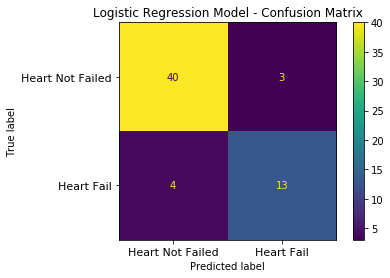

In [7]:
#MODELING - Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

plot_confusion_matrix(log_reg, x_test, y_test)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.show()

Accuracy of SVC is :  90.00%


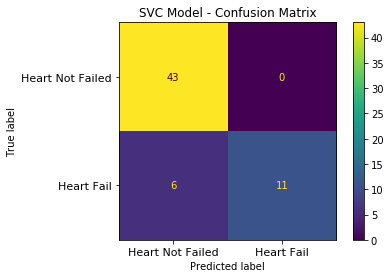

In [8]:
#MODELING - SUPPORT VECTOR

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

plot_confusion_matrix(sv_clf, x_test, y_test)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.show()

Accuracy of K Neighbors is :  83.33%


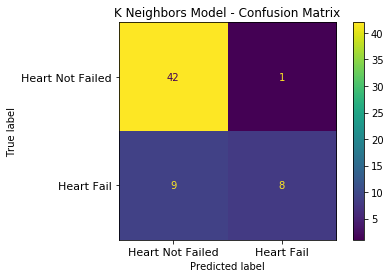

In [9]:
#MODELING - K Neighbors Classifier
kn_clf = KNeighborsClassifier(n_neighbors=2)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

print(Fore.GREEN + "Accuracy of K Neighbors is : ", "{:.2f}%".format(100* kn_acc))

plot_confusion_matrix(kn_clf, x_test, y_test)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.show()

Accuracy of Random Forest Classifier is :  88.33%


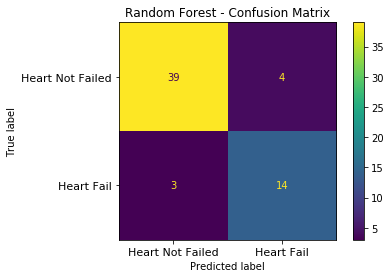

In [10]:
#MODELING - Random Forest
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

plot_confusion_matrix(r_clf, x_test, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.show()

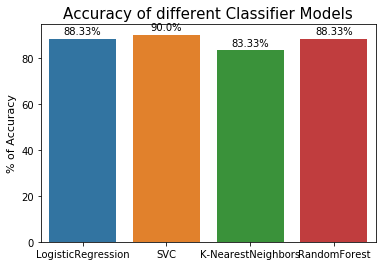

In [11]:
model_list = ['LogisticRegression', 'SVC', 'K-NearestNeighbors', 'RandomForest']
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.ylabel('% of Accuracy', fontsize = 11)
plt.title('Accuracy of different Classifier Models', fontsize = 15)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')

- In respect of accuracy, of course, SVC has the highest value among the classifier models
<br>
- Random Forest is the most suitable among 4 classifier models since it has minimum false negative in heart failure prediction.